# Stochastic processes course 2018/2019-2 @ ELTE
# Assignment 10: Graph theory 2.
## 01.05.2019

In [85]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import random
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import statistics
from scipy.optimize import curve_fit

sns.set_style(style='whitegrid')

steps = 1
image_path = '.\\Documentation\\src\\images\\'
image_format = 'pdf'
image_dpi = 150

# Preferential Attachment Model (Barabási-Albert model)

In [59]:
def pref_graph(n_edges_pm, mode='1', current_index=0, all_index=1):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    #
    # That means, that the first value of the graph_pm array, with index "0",
    # indicates the edge between the 1. and 2. points, and thus its value is "1."
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_pm+1)
    graph_pm = np.zeros((n_edges_pm+1), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the degree of the (N+1)th point
    #
    # Points are indexed from "1", but the first point is indicated
    # by the "0" index of the count_pm array
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_pm+1)
    count_pm = np.zeros((n_edges_pm+1), dtype='int')
    
    # Total number of vertices with specific degrees
    # Nth element indicates the number of vertices
    # with N degrees
    #
    # Length: Number of maximum possible degrees, which equals to number of edges (n_edges_pm)
    # +1 for zero degree
    dist_pm = np.zeros((n_edges_pm+1), dtype='int')
    
    # Initial conditions:
    
    # 2 points, with 1 connected edge
    if(mode=='1'):
        graph_pm[0] = 1              # The second point is connected to the first one
        count_pm[0] = 1              # The first point has 1 degree
        count_pm[1] = 1              # The second point has 1 degree
        dist_pm[0] = n_edges_pm+1-2  # There are (total number of points - 2) points with 0 degree yet
        dist_pm[1] = 2               # There are two point with 1 degree yet
        
        count_edges = 2
    
    # 5 points, linearly connected
    elif(mode=='2'):
        graph_pm[0] = 1              # The second point is connected to the first one
        graph_pm[1] = 2              # The third point is connected to the second one
        graph_pm[2] = 3              # etc...
        graph_pm[3] = 4              # etc...
        count_pm[0] = 1              # All of the points have 1 degree
        count_pm[1] = 1
        count_pm[2] = 1
        count_pm[3] = 1
        count_pm[4] = 1
        dist_pm[0] = n_edges_pm+1-5  # There are (total number of points - 5) points with 0 degree yet
        dist_pm[1] = 5               # There are five point with 1 degree yet
        
        count_edges = 5

    # 5 points, cross-connected
    elif(mode=='3'):
        graph_pm[0] = 1              # The second, third, fourth and fifth points are connected to the first one
        graph_pm[1] = 1
        graph_pm[2] = 1
        graph_pm[3] = 1
        count_pm[0] = 4              # All of the points have 1 degree, except the first one, which has 4
        count_pm[1] = 1
        count_pm[2] = 1
        count_pm[3] = 1
        count_pm[4] = 1
        dist_pm[0] = n_edges_pm+1-5  # There are (total number of points - 5) points with 0 degree yet
        dist_pm[1] = 4               # There are four points with 1 degree yet
        dist_pm[4] = 1               # There is one point with 4 degree yet
        
        count_edges = 5

    while(count_edges < n_edges_pm):
        
        # Choose an endpoint for the edge, brought into the graph by the new vertex
        # Anti-preferencial attachment process
        choosen_random = random.randint(1, count_edges+1)
        
        # Degree of choosen point
        choosen_degree = float(count_pm[choosen_random - 1])
        
        # Norm factor (A_norm)
        # A = sum_(l=1)^(N) l * N_l
        A_norm = 0
        
        for i in range(1, n_edges_pm):
            if(dist_pm[i] != 0):
                A_norm += dist_pm[i]*i
        
        # Transistions rate (w_k)
        # w_k = k / A
        w_current = choosen_degree / A_norm
        
        if(w_current < random.random()):

            graph_pm[count_edges] = choosen_random

            # Increment the degrees of the two connected point
            count_pm[choosen_random - 1] += 1
            count_pm[count_edges + 1] += 1
            
            # Update distributions
            dist_pm[count_pm[choosen_random - 1]] += 1
            dist_pm[count_pm[count_edges + 1]] += 1
            dist_pm[count_pm[choosen_random - 1] - 1] -= 1
            dist_pm[count_pm[count_edges + 1] - 1] -= 1
            
            # Increment total number of edges
            count_edges += 1
            
            sys.stdout.write('\rCurrent:\t{0}/{1}\t\t{2}/{3}'.format(count_edges, n_edges_pm, current_index+1, all_index))
            sys.stdout.flush()

    return(graph_pm, count_pm, dist_pm)

In [60]:
n_edges_pm = 2000
graph_pm_1, count_pm_1, dist_pm_1 = pref_graph(n_edges_pm, mode='1')
graph_pm_2, count_pm_2, dist_pm_2 = pref_graph(n_edges_pm, mode='2')
graph_pm_3, count_pm_3, dist_pm_3 = pref_graph(n_edges_pm, mode='3')

Current:	2000/2000		1/1

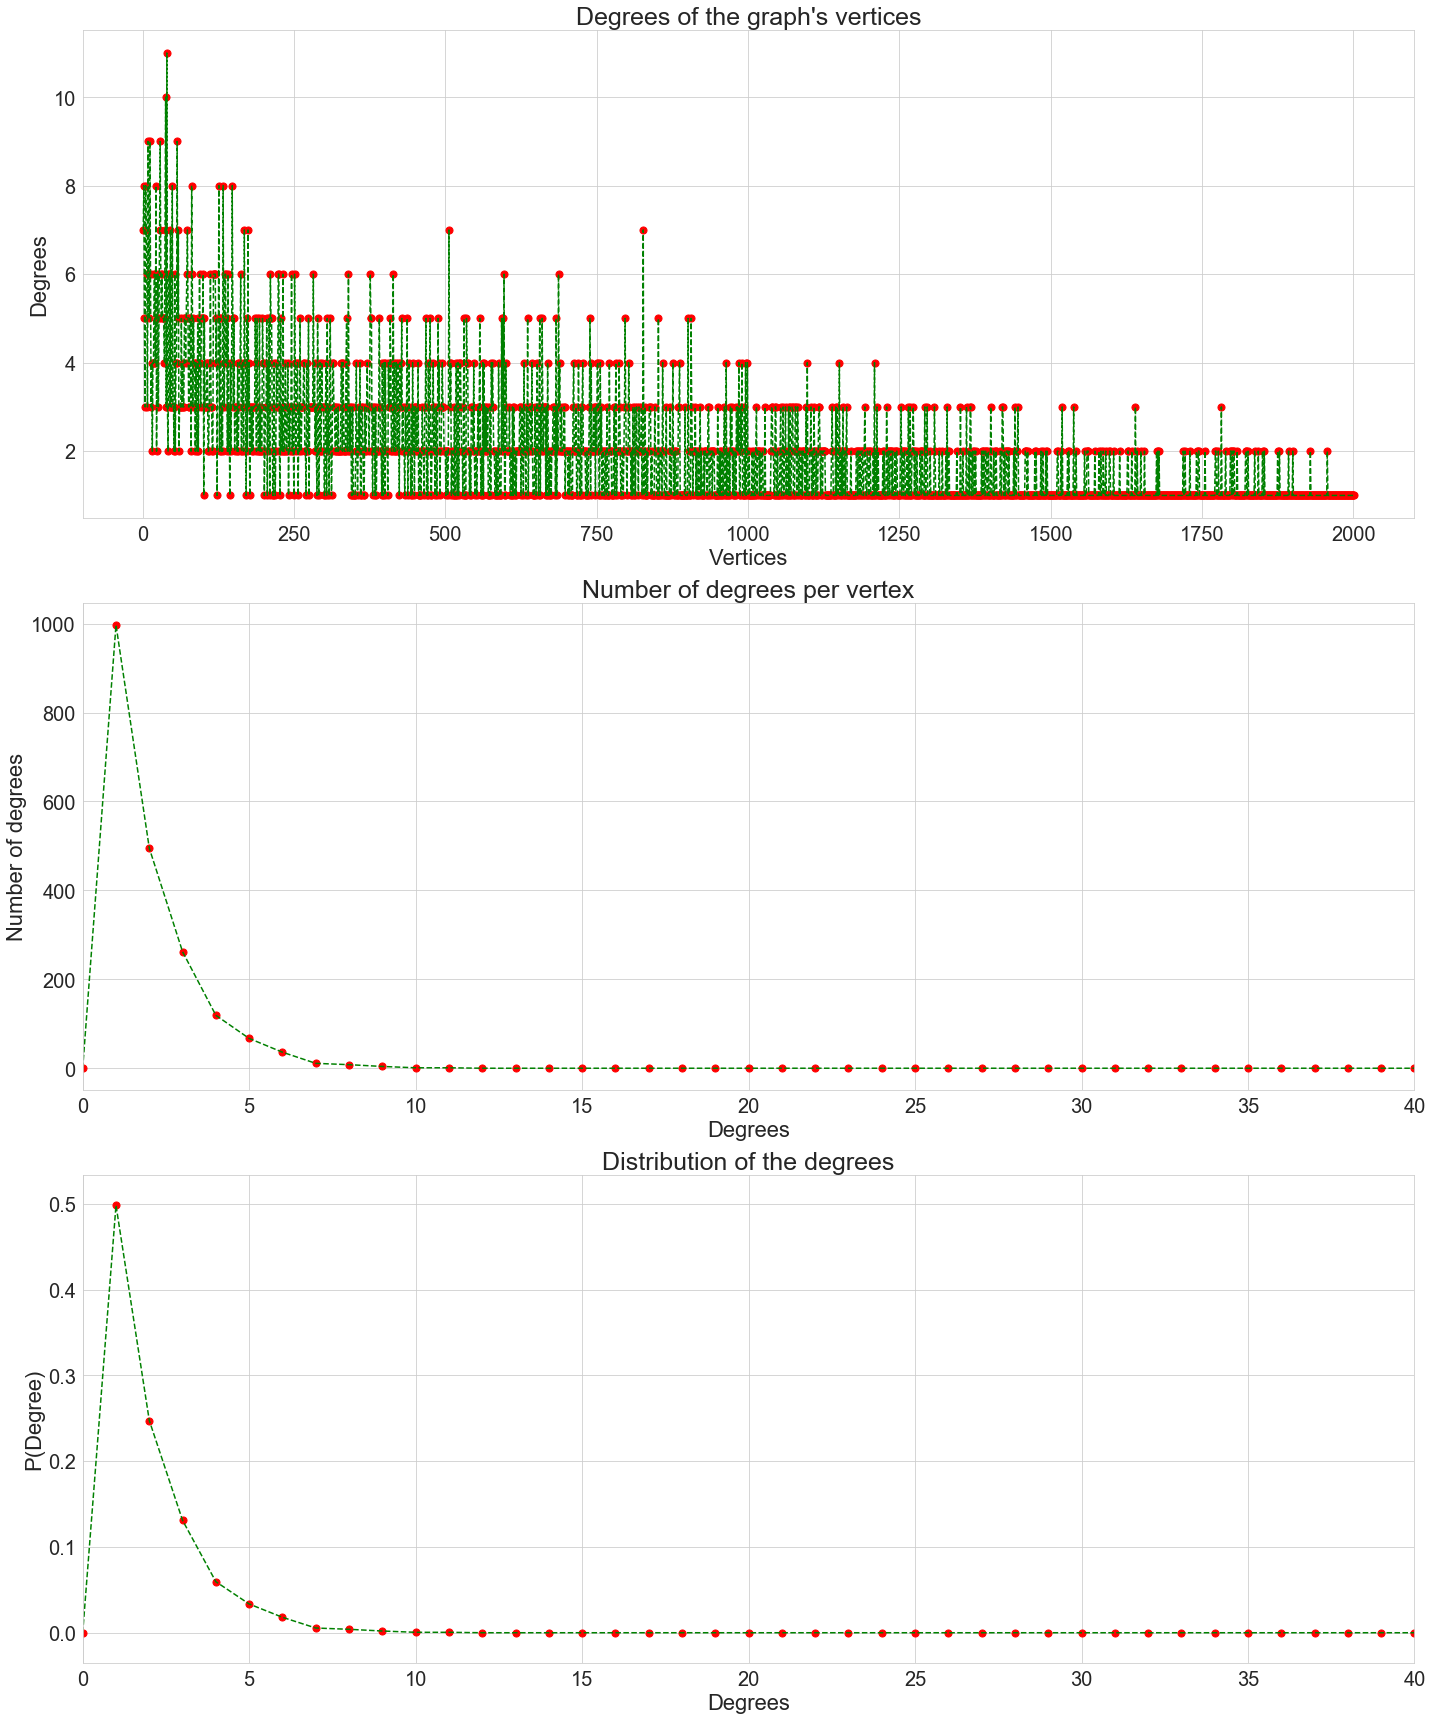

In [61]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_pm+2)],
             count_pm_1, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_pm+2)],
             count_pm_1, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm_1, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_pm+1)],
             dist_pm_1, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm_1/(n_edges_pm+1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_pm+1)],
             dist_pm_1/(n_edges_pm+1), color='green', linestyle='--')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)
axes[1].set_xlim(0, 40)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)
axes[2].set_xlim(0, 40)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'pm_' + '1' + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

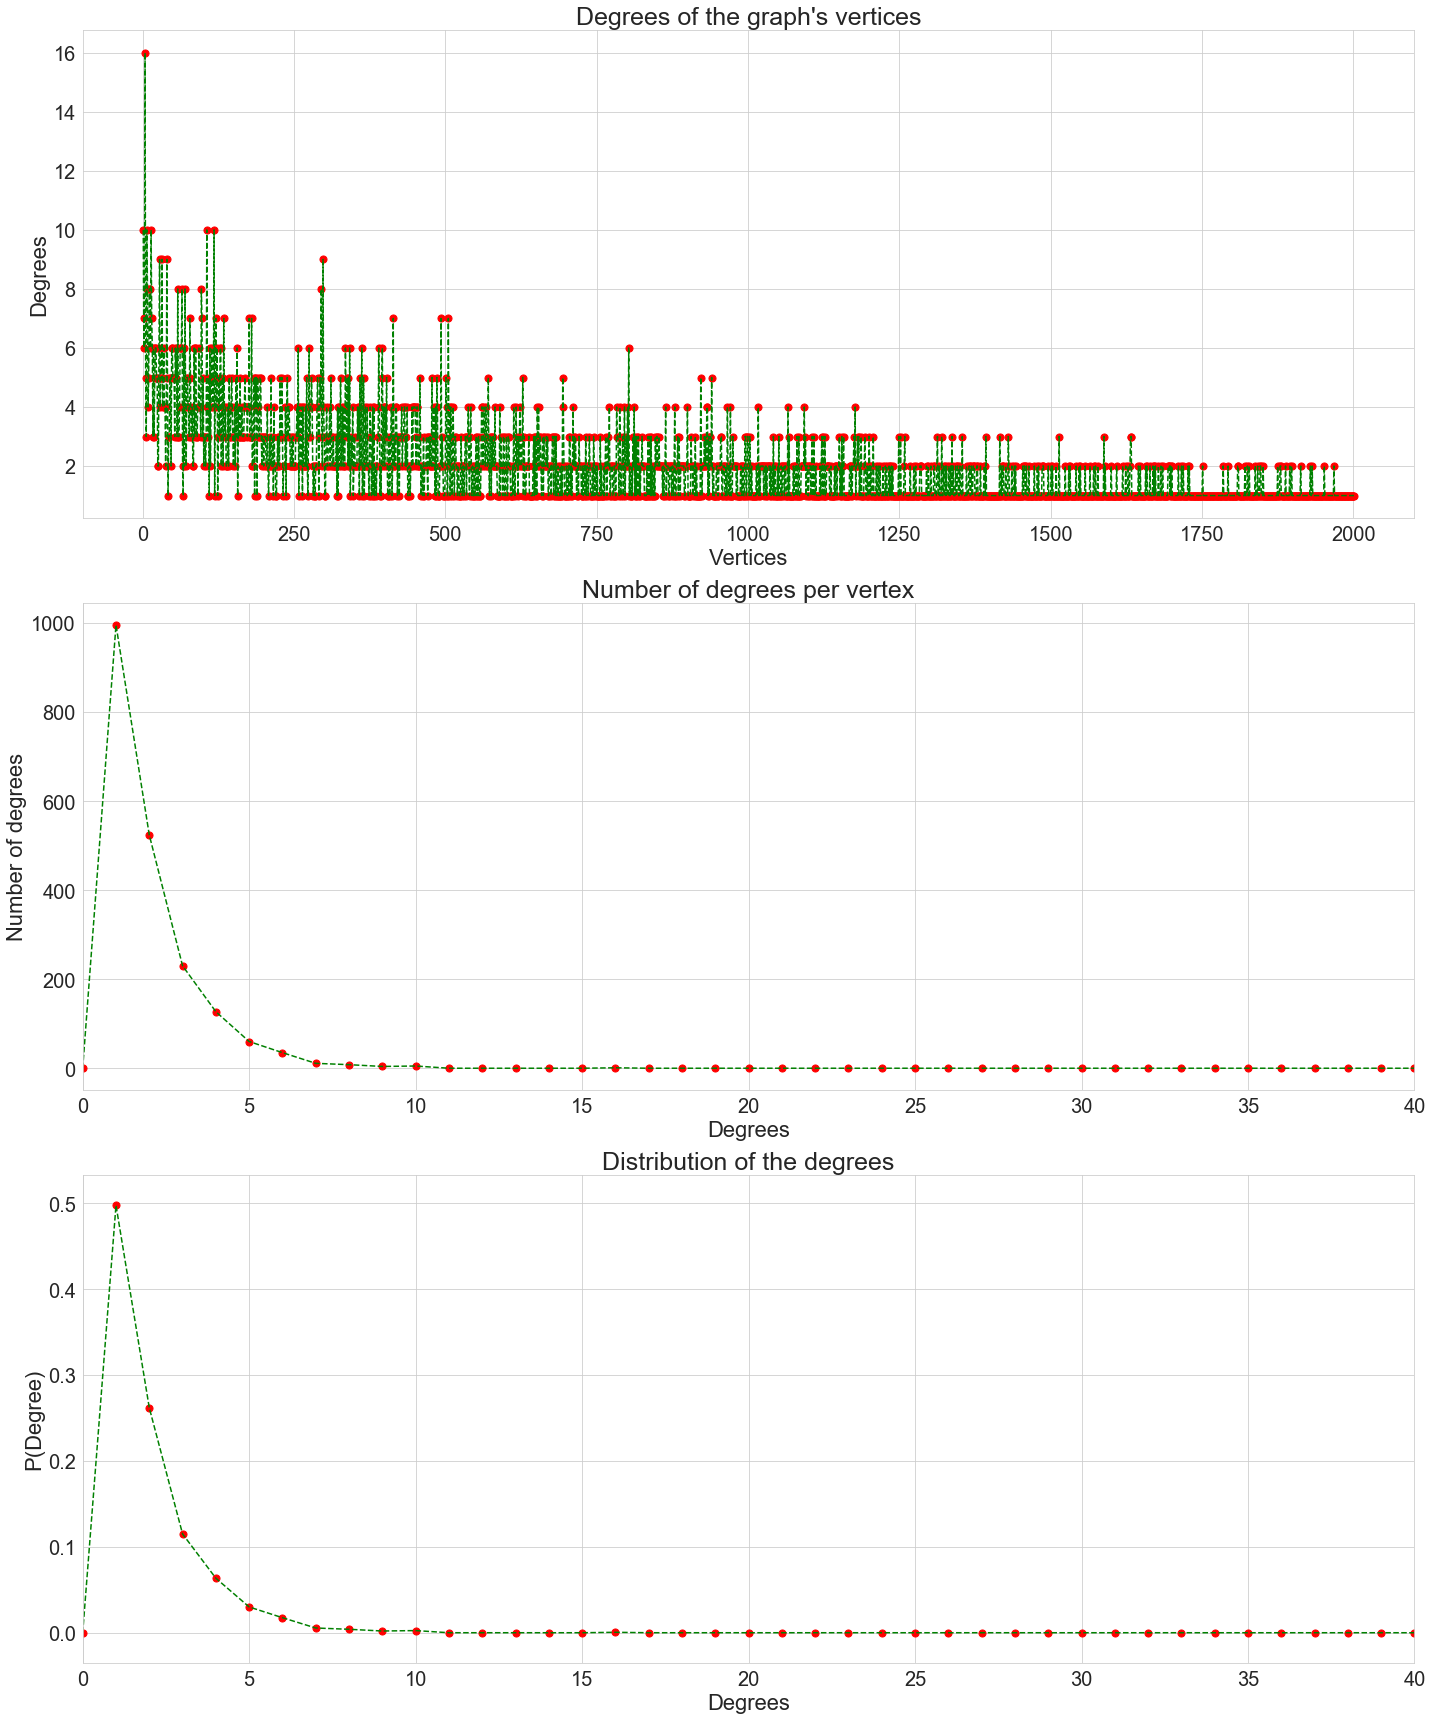

In [62]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_pm+2)],
             count_pm_2, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_pm+2)],
             count_pm_2, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm_2, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_pm+1)],
             dist_pm_2, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm_2/(n_edges_pm+1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_pm+1)],
             dist_pm_2/(n_edges_pm+1), color='green', linestyle='--')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)
axes[1].set_xlim(0, 40)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)
axes[2].set_xlim(0, 40)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'pm_' + '2' + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

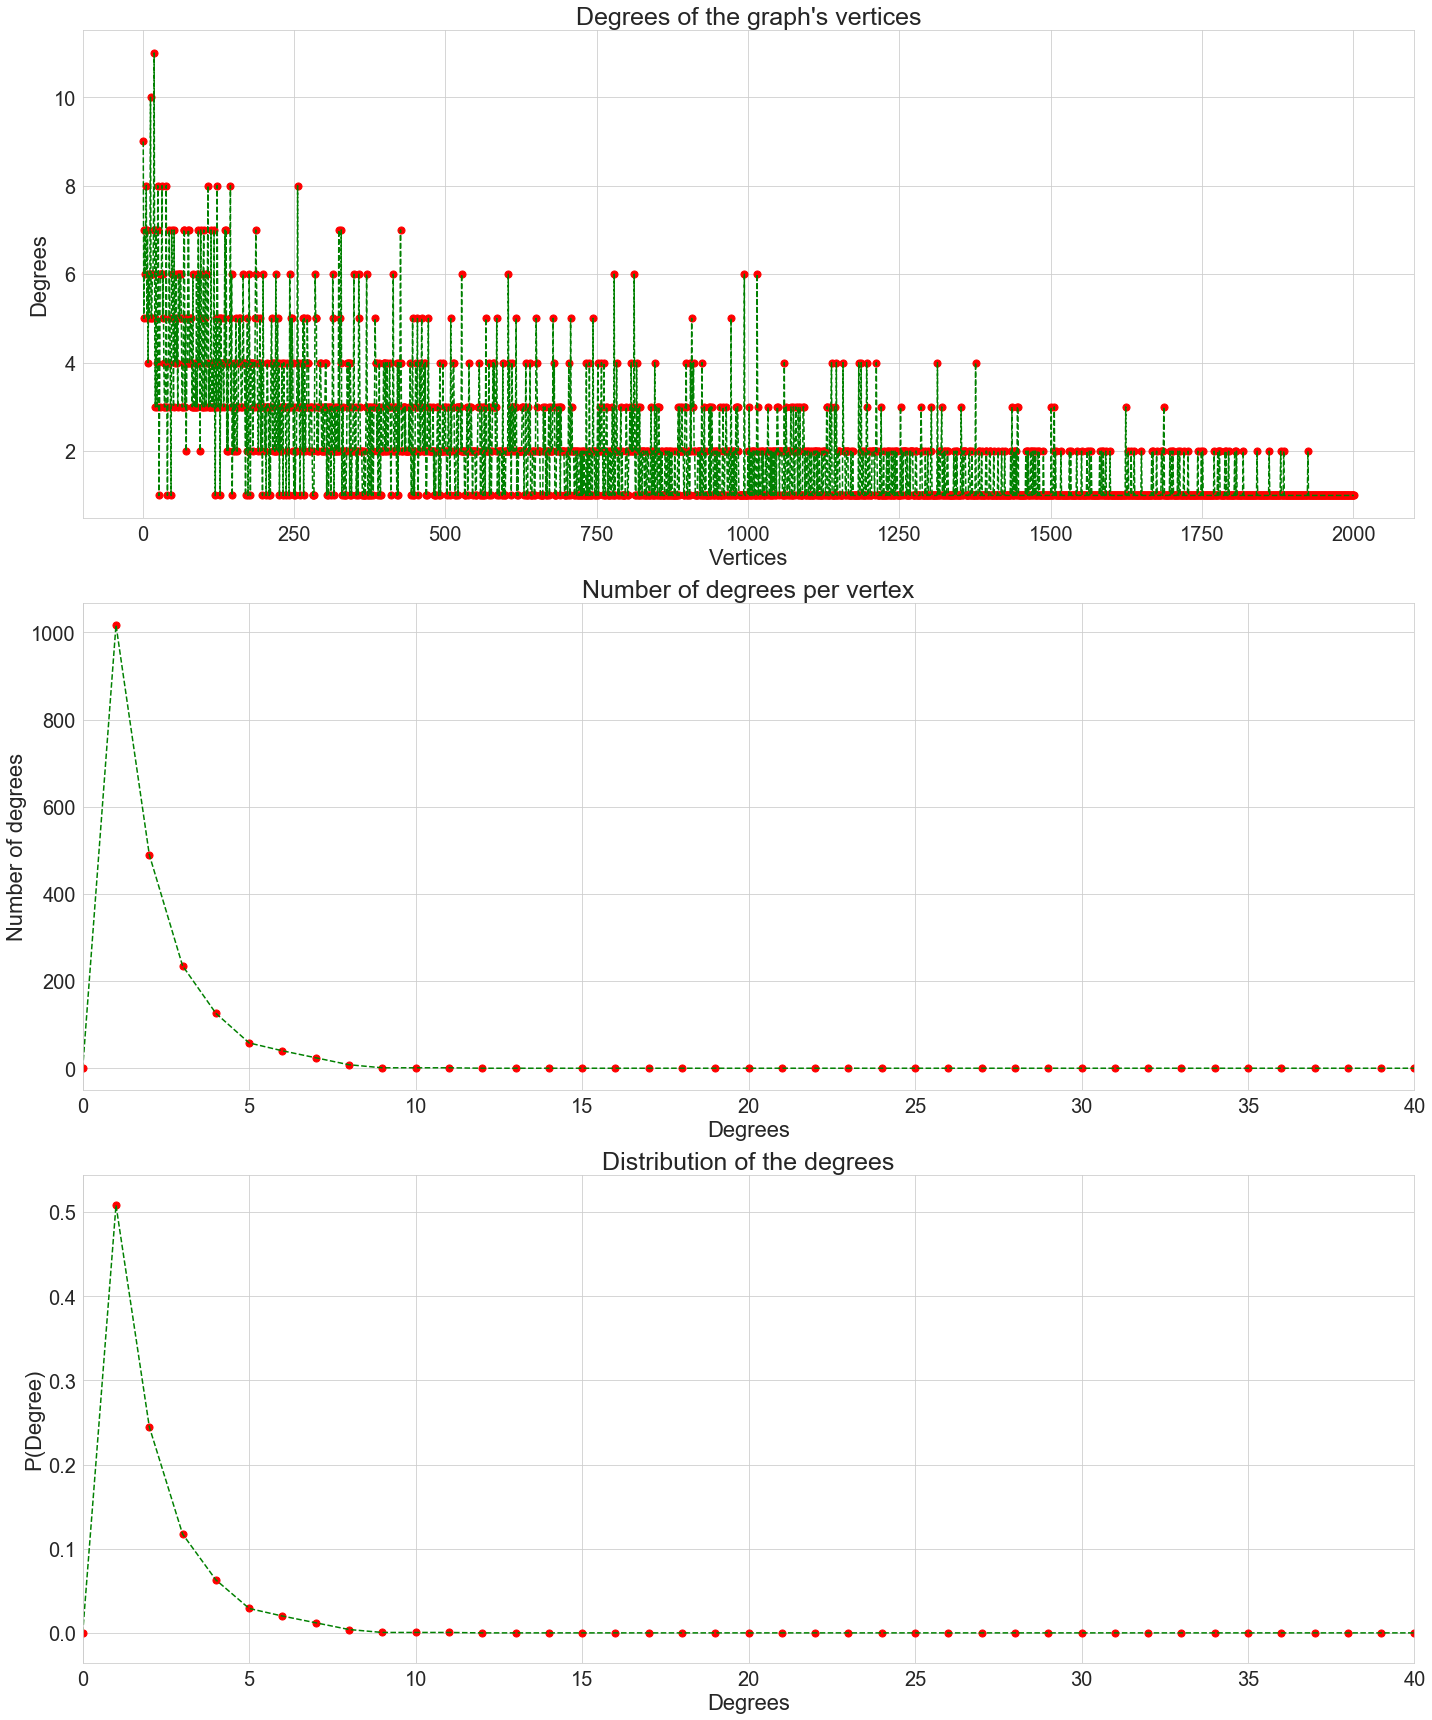

In [63]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_pm+2)],
             count_pm_3, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_pm+2)],
             count_pm_3, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm_3, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_pm+1)],
             dist_pm_3, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm_3/(n_edges_pm+1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_pm+1)],
             dist_pm_3/(n_edges_pm+1), color='green', linestyle='--')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)
axes[1].set_xlim(0, 40)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)
axes[2].set_xlim(0, 40)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'pm_' + '3' + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## $P_{k}$ dependence from initial conditions

In [89]:
def func(x, a, b, c, d):
    return a * 1/x**(3) + b * 1/x**(2) + c * 1/x**(1) + d

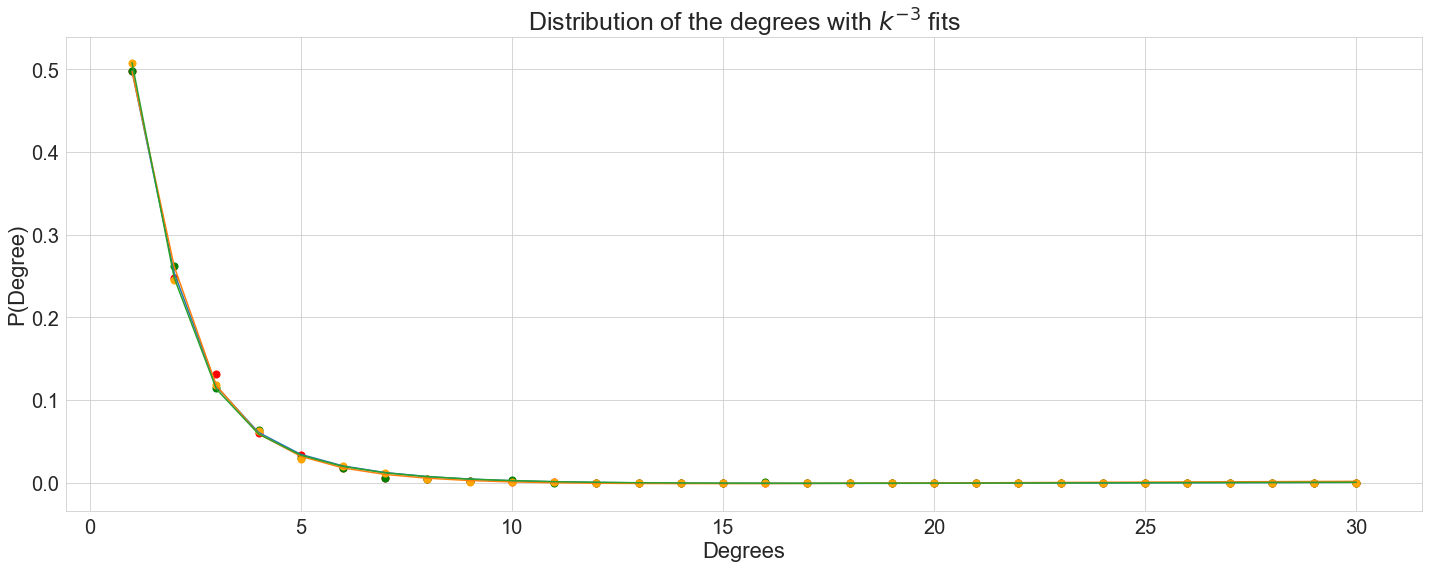

In [92]:
fig, axes = plt.subplots(figsize=(20, 8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

max_plot = 30

xdata = np.array([k for k in range(1, max_plot+1)])

popt_pm_1, pcov_pm_1 = curve_fit(func, xdata, dist_pm_1[1:max_plot+1]/(n_edges_pm+1))
popt_pm_2, pcov_pm_2 = curve_fit(func, xdata, dist_pm_2[1:max_plot+1]/(n_edges_pm+1))
popt_pm_3, pcov_pm_3 = curve_fit(func, xdata, dist_pm_3[1:max_plot+1]/(n_edges_pm+1))

axes.scatter(xdata,
             dist_pm_1[1:max_plot+1]/(n_edges_pm+1), color='red', s=scattersize)
axes.scatter(xdata,
             dist_pm_2[1:max_plot+1]/(n_edges_pm+1), color='green', s=scattersize)
axes.scatter(xdata,
             dist_pm_3[1:max_plot+1]/(n_edges_pm+1), color='orange', s=scattersize)

axes.plot(xdata, func(xdata, *popt_pm_1))
axes.plot(xdata, func(xdata, *popt_pm_2))
axes.plot(xdata, func(xdata, *popt_pm_3))

axes.set_title('Distribution of the degrees with $k^{-3}$ fits', fontsize=titlesize)

axes.set_xlabel('Degrees', fontsize=axislabelsize)
axes.set_ylabel('P(Degree)', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'pm_diff.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

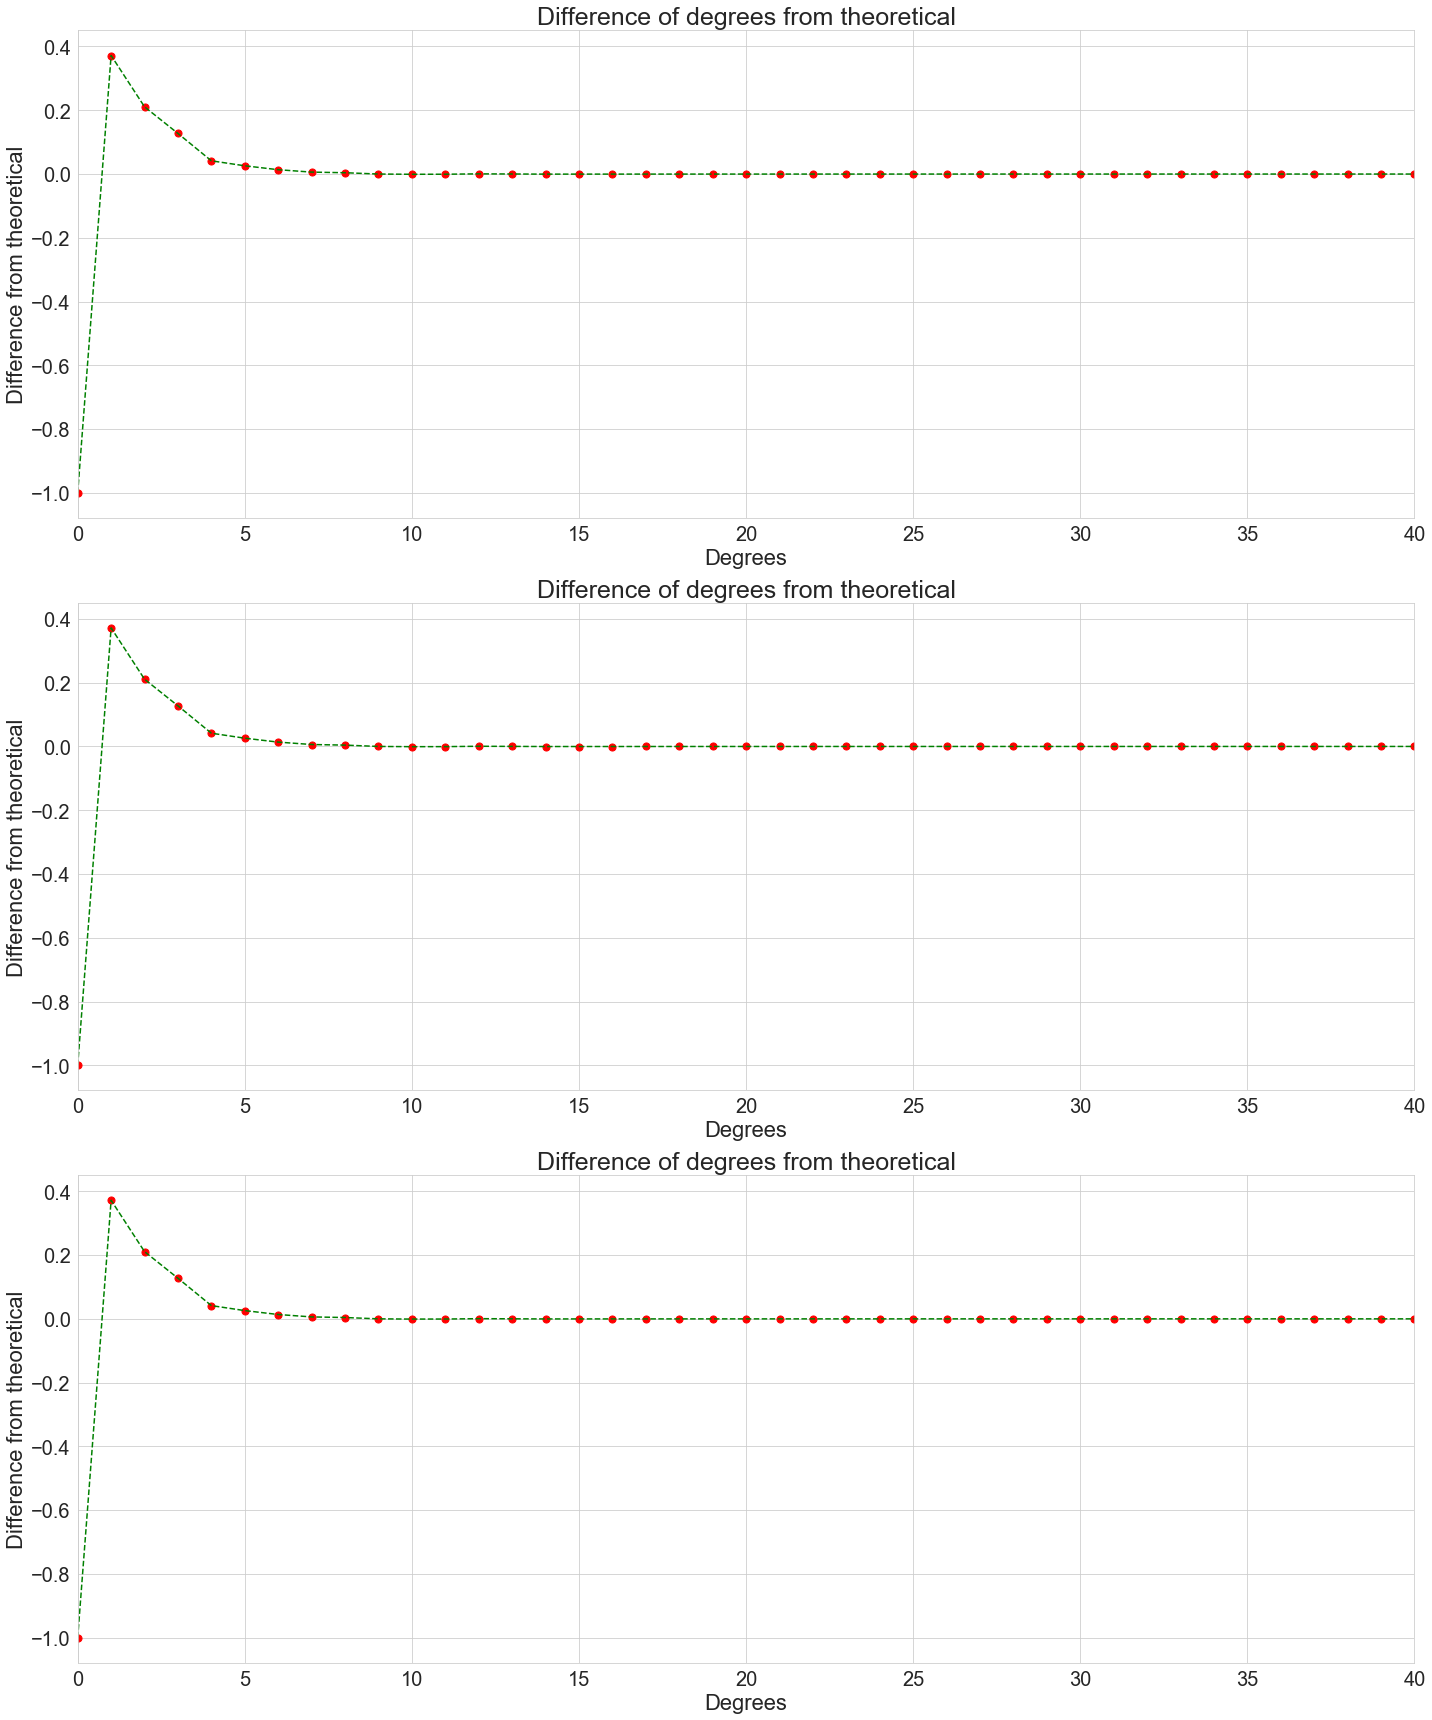

In [37]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

for i in range(0, nrows):
    
    axes[i].scatter([k for k in range(0, n_edges_pm+1)],
                dist_pm/(n_edges_pm+1) - np.array([k**(-3) for k in range(1, n_edges_pm+2)]), color='red', s=scattersize)
    axes[i].plot([k for k in range(0, n_edges_pm+1)],
                 dist_pm/(n_edges_pm+1) - np.array([k**(-3) for k in range(1, n_edges_pm+2)]), color='green', linestyle='--')

    axes[i].set_xlim(0,40)
    
    axes[i].set_title('Difference of degrees from theoretical', fontsize=titlesize)
    axes[i].set_xlabel('Degrees', fontsize=axislabelsize)
    axes[i].set_ylabel('Difference from theoretical', fontsize=axislabelsize)
    
    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'pm_diff.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Maximum degree, respect to edges

In [29]:
degree_runs_pm_min = 100
degree_runs_pm_max = 2000

steps_max_pm = 5

sampling_max_pm = [k for k in range(degree_runs_pm_min, degree_runs_pm_max)][::steps_max_pm]
length_max_pm = len(sampling_max_pm)

max_degree_pm_1 = np.zeros((length_max_pm))
max_degree_pm_2 = np.zeros((length_max_pm))
max_degree_pm_3 = np.zeros((length_max_pm))

j = 0
for i in sampling_max_pm:
    _, count_pm_current, _ = pref_graph(n_edges_pm=i, mode='1', current_index=j, all_index=length_max_pm)
    max_degree_pm_1[j] = np.max(count_pm_current)
    _, count_pm_current, _ = pref_graph(n_edges_pm=i, mode='2', current_index=j, all_index=length_max_pm)
    max_degree_pm_2[j] = np.max(count_pm_current)
    _, count_pm_current, _ = pref_graph(n_edges_pm=i, mode='3', current_index=j, all_index=length_max_pm)
    max_degree_pm_3[j] = np.max(count_pm_current)

    j += 1

Current:	1995/1995		380/380

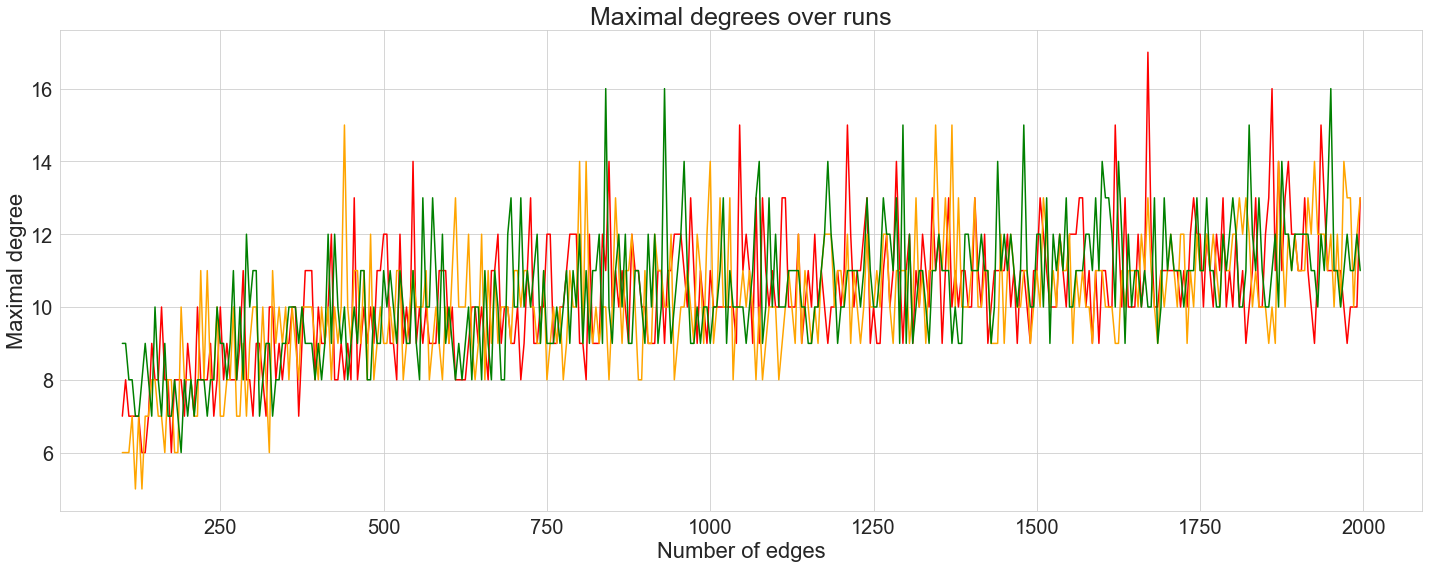

In [32]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

axes.plot([k for k in range(degree_runs_pm_min, degree_runs_pm_max)][::steps_max_pm],
             max_degree_pm_1, color='red', label='One vertex')
axes.plot([k for k in range(degree_runs_pm_min, degree_runs_pm_max)][::steps_max_pm],
             max_degree_pm_2, color='orange', label='Linear')
axes.plot([k for k in range(degree_runs_pm_min, degree_runs_pm_max)][::steps_max_pm],
             max_degree_pm_3, color='green', label='Cross')

axes.set_title('Maximal degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Maximal degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'pm_maxdegrees.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()